In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import stats

In [2]:
matches = pd.read_csv('matches.csv')
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
deliveries = pd.read_csv('deliveries.csv')
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


#### Frequency distribution graph
Let's take win_by_wickets dataset and plot a frequency distribution graph.
- X-axis - Win by wickets (value from 1 to 10), 
- Y-axis - Number of instances (or frequency) of win-by-wicket margin

1      3
2      6
3     18
4     41
5     71
6     85
7     80
8     54
9     37
10    11
Name: win_by_wickets, dtype: int64


Text(0, 0.5, 'Frequency')

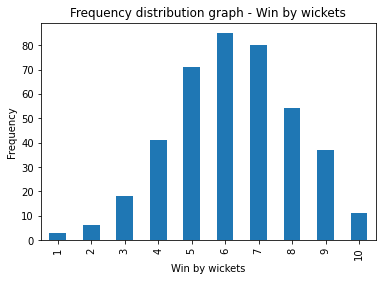

In [4]:
win_by_wickets_data = matches[matches.win_by_wickets>0].win_by_wickets
win_by_wickets_freq = win_by_wickets_data.value_counts(sort=False)
print(win_by_wickets_freq)
plt = win_by_wickets_freq.plot.bar()
plt.set_title("Frequency distribution graph - Win by wickets")
plt.set_xlabel("Win by wickets")
plt.set_ylabel("Frequency")

#### Relative frequency distribution graph for the same data. 
- Here in Y-axis, instead of showing the frequency, we show the percentage of the value. 
- We can use normalize = True argument for pandas.Series.value_counts method

1     0.007389
2     0.014778
3     0.044335
4     0.100985
5     0.174877
6     0.209360
7     0.197044
8     0.133005
9     0.091133
10    0.027094
Name: win_by_wickets, dtype: float64


Text(0, 0.5, 'Relative frequency (%)')

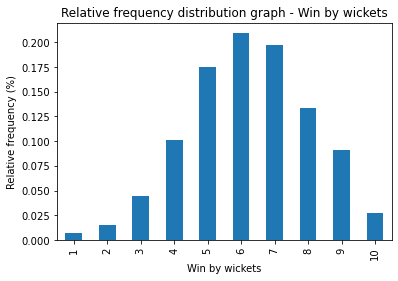

In [5]:
win_by_wickets_rel_freq = win_by_wickets_data.value_counts(sort=False, normalize=True)
print(win_by_wickets_rel_freq)
plt = win_by_wickets_rel_freq.plot.bar()
plt.set_title("Relative frequency distribution graph - Win by wickets")
plt.set_xlabel("Win by wickets")
plt.set_ylabel("Relative frequency (%)")

#### cumulative relative frequency graph

1     0.007389
2     0.022167
3     0.066502
4     0.167488
5     0.342365
6     0.551724
7     0.748768
8     0.881773
9     0.972906
10    1.000000
Name: win_by_wickets, dtype: float64


Text(0, 0.5, 'Cumulative relative frequency (%)')

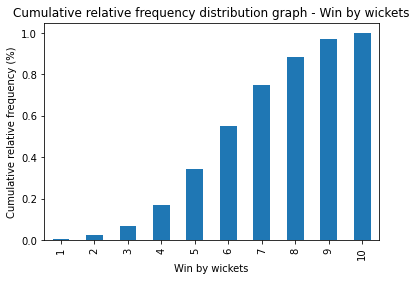

In [6]:
win_by_wickets_cumulative_freq = win_by_wickets_data.value_counts(sort=False, normalize=True).cumsum()
print(win_by_wickets_cumulative_freq)
plt = win_by_wickets_cumulative_freq.plot.bar()
plt.set_title("Cumulative relative frequency distribution graph - Win by wickets")
plt.set_xlabel("Win by wickets")
plt.set_ylabel("Cumulative relative frequency (%)")

#### Normal distribution and variance
- If the variance of the dataset is high, the curve tends to look flat.
- If variance is low, curve is more steeper.

Let's plot win_by_wickets data and watch the curve.

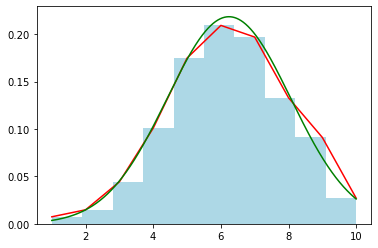

In [7]:
# Get mean (mu) and std (sigma)
win_by_wickets_mean, win_by_wickets_std = win_by_wickets_data.mean(), win_by_wickets_data.std()

# Plot histogram (normalized) - Light blue
win_by_wickets_data.hist(color='lightblue', weights = np.zeros_like(win_by_wickets_data) + 1.0 / win_by_wickets_data.count())

# Plot line graph - red
win_by_wickets_data.value_counts(sort=False, normalize=True).plot.line(color='red')

# Normal distribution for random points between 1 to 10 with mean, std.
random_data = np.arange(1, 10, 0.001)
pyplot.plot(random_data, stats.norm.pdf(random_data, win_by_wickets_mean, win_by_wickets_std), color='green')